<a href="https://colab.research.google.com/github/vadim13213/practice/blob/main/10.%20%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%2C%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [75]:
API_KEY = "50602392e1259574222bdd7c564ab491"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [ ]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "Ваш_API_ключ"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [ ]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-04-25 12:00:00,11.02,44,few clouds
1,Paris,FR,48.858890,2.320041,2024-04-25 15:00:00,12.59,40,broken clouds
2,Paris,FR,48.858890,2.320041,2024-04-25 18:00:00,11.40,56,light rain
3,Paris,FR,48.858890,2.320041,2024-04-25 21:00:00,10.19,72,light rain
4,Paris,FR,48.858890,2.320041,2024-04-26 00:00:00,8.07,82,broken clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-04-29 21:00:00,10.01,78,few clouds
116,Moscow,RU,55.750446,37.617494,2024-04-30 00:00:00,7.73,79,clear sky
117,Moscow,RU,55.750446,37.617494,2024-04-30 03:00:00,6.20,75,clear sky
118,Moscow,RU,55.750446,37.617494,2024-04-30 06:00:00,8.93,55,clear sky


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [ ]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [ ]:
import requests
import pandas as pd
import plotly.express as px

# Замените на свой API ключ OpenWeatherMap
API_KEY = "Ваш_API_ключ"

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)

fig.show()


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [157]:
import requests
import pandas as pd

locations = ["Sydney,AU", "Cairo,EG", "Moscow,RU", "Tokyo,JP"]

weather_data_list = []

for location in locations:
    city, country = location.split(',')

    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()

    if geocode_response:
        latitude = geocode_response[0]['lat']
        longitude = geocode_response[0]['lon']

        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']
        for entry in forecast_data:

            weather_data_list.append({
                "city": city,
                "datetime": entry['dt_txt'],
                "dt": entry["dt"],
                "temp": entry["main"]["temp"] - 273.15,
                "feels_like": entry["main"]["feels_like"] - 273.15,
                "temp_min": entry["main"]["temp_min"] - 273.15,
                "temp_max": entry["main"]["temp_max"] - 273.15,
                "humidity": entry["main"]["humidity"],
                "pressure":  entry["main"]["pressure"],
                "lat": geocode_response[0]['lat'],
                "lot": geocode_response[0]['lon']
            })


weather_data = pd.DataFrame(weather_data_list)

weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data

,city,datetime,dt,temp,feels_like,temp_min,temp_max,humidity,pressure,lat,lot
0,Sydney,2024-05-16 03:00:00,1715828400,19.02,18.83,19.02,20.45,71,1027,-33.869844,151.208285
1,Sydney,2024-05-16 06:00:00,1715839200,18.73,18.62,18.73,18.95,75,1026,-33.869844,151.208285
2,Sydney,2024-05-16 09:00:00,1715850000,17.83,17.78,17.83,17.83,81,1027,-33.869844,151.208285
3,Sydney,2024-05-16 12:00:00,1715860800,16.93,16.90,16.93,16.93,85,1027,-33.869844,151.208285
4,Sydney,2024-05-16 15:00:00,1715871600,16.16,16.08,16.16,16.16,86,1026,-33.869844,151.208285
...,...,...,...,...,...,...,...,...,...,...,...
155,Tokyo,2024-05-20 12:00:00,1716206400,17.93,18.08,17.93,17.93,88,1013,35.682839,139.759455
156,Tokyo,2024-05-20 15:00:00,1716217200,18.20,18.24,18.20,18.20,83,1011,35.682839,139.759455
157,Tokyo,2024-05-20 18:00:00,1716228000,18.25,18.22,18.25,18.25,80,1012,35.682839,139.759455
158,Tokyo,2024-05-20 21:00:00,1716238800,18.89,18.74,18.89,18.89,73,1014,35.682839,139.759455


In [ ]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Sydney,AU,-33.869844,151.208285,2024-05-16 00:00:00,14.02,85,light rain
1,Sydney,AU,-33.869844,151.208285,2024-05-16 03:00:00,17.18,76,broken clouds
2,Sydney,AU,-33.869844,151.208285,2024-05-16 06:00:00,18.72,75,overcast clouds
3,Sydney,AU,-33.869844,151.208285,2024-05-16 09:00:00,17.69,81,overcast clouds
4,Sydney,AU,-33.869844,151.208285,2024-05-16 12:00:00,16.98,83,overcast clouds
...,...,...,...,...,...,...,...,...
155,Beijing,CN,39.906217,116.391276,2024-05-20 09:00:00,28.98,24,clear sky
156,Beijing,CN,39.906217,116.391276,2024-05-20 12:00:00,24.97,49,clear sky
157,Beijing,CN,39.906217,116.391276,2024-05-20 15:00:00,21.39,61,overcast clouds
158,Beijing,CN,39.906217,116.391276,2024-05-20 18:00:00,20.07,65,overcast clouds


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [159]:
# Вычисление среднего значения температуры
mean_temperature = weather_data['temp'].mean()

# Вычисление стандартного отклонения температуры
std_temperature = weather_data['temp'].std()

print("Средняя температура по всем городам:", mean_temperature, "градусов Цельсия")
print("Стандартное отклонение температуры по всем городам:", std_temperature, "градусов Цельсия")


Средняя температура по всем городам: 19.95418750000002 градусов Цельсия
Стандартное отклонение температуры по всем городам: 8.013080695261568 градусов Цельсия


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

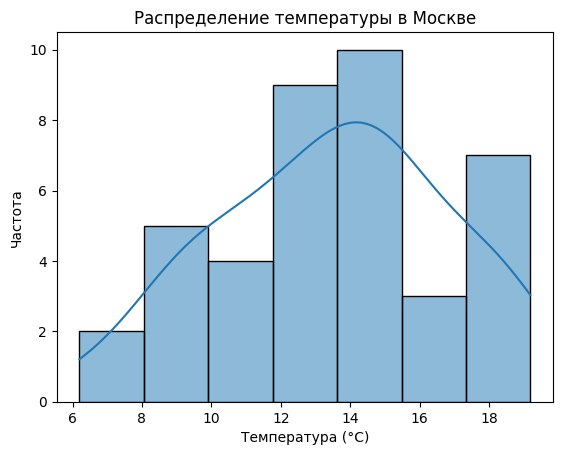

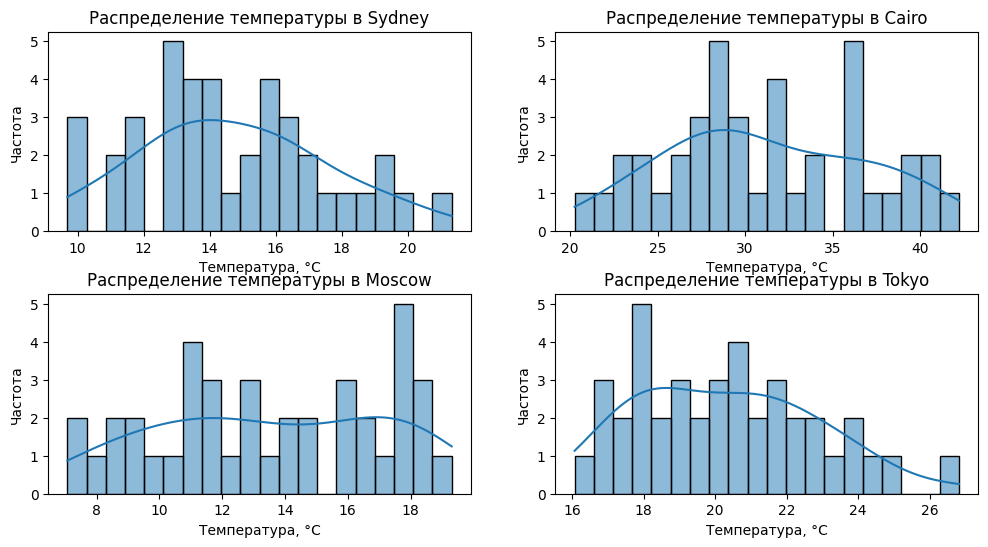

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, city in enumerate(weather_data['city'].unique()):
    city_data = weather_data[weather_data['city'] == city]
    plt.subplot(2,2,i+1)
    sns.histplot(city_data['temp'], bins=20, kde=True)
    plt.xlabel("Температура, °C")
    plt.ylabel("Частота")
    plt.title(f"Распределение температуры в {city}")
plt.subplots_adjust(hspace=0.314)
plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

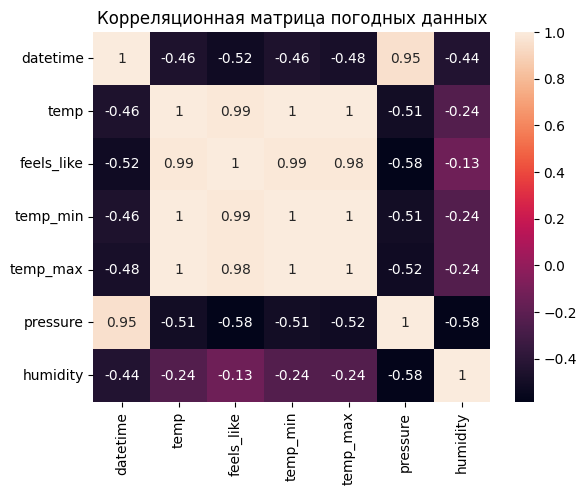

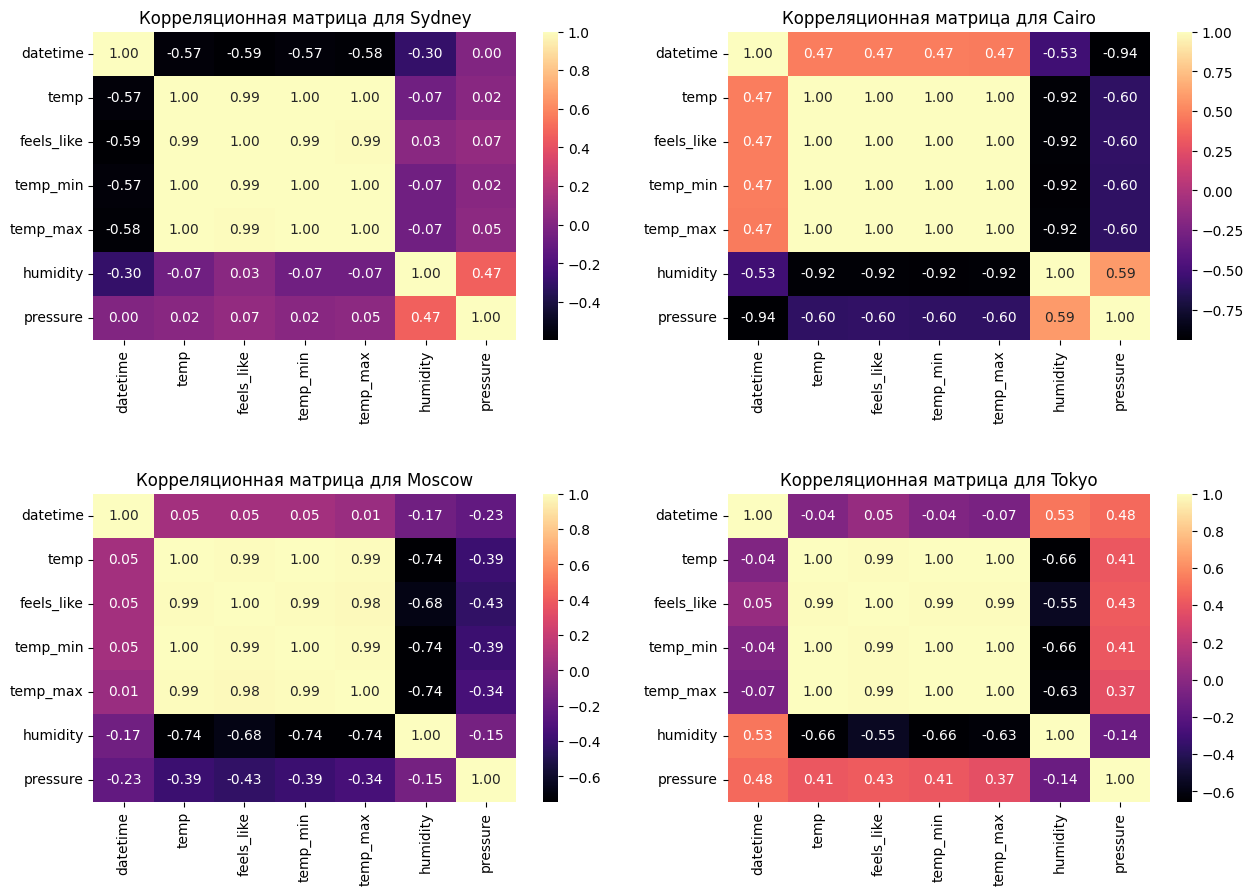

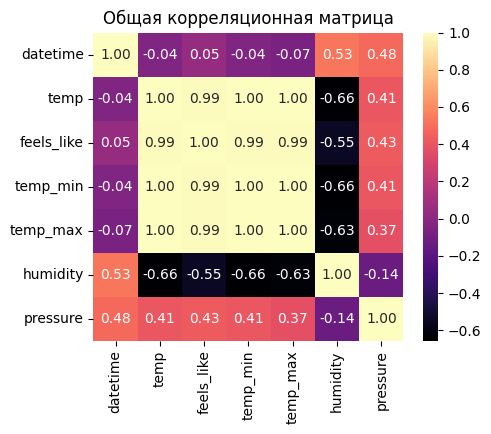

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, city in enumerate(weather_data['city'].unique()):
    city_data = weather_data[weather_data['city'] == city]
    numeric_cols = ["datetime", "temp", "feels_like", "temp_min", "temp_max", "humidity", "pressure"]
    city_data = city_data[numeric_cols]
    corr_matrix = city_data.corr()
    plt.subplot(2,2,i+1)
    sns.heatmap(corr_matrix,annot=True, cmap='magma',fmt=".2f")
    plt.title(f'Корреляционная матрица для {city}')
plt.subplots_adjust(hspace=0.5)
plt.show()

numeric_cols = ["datetime", "temp", "feels_like", "temp_min", "temp_max", "humidity", "pressure"]
weather_data2 = weather_data[numeric_cols]
total_corr_matrix = weather_data2.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix,annot=True, cmap='magma',fmt=".2f")
plt.title(f'Общая корреляционная матрица')
plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

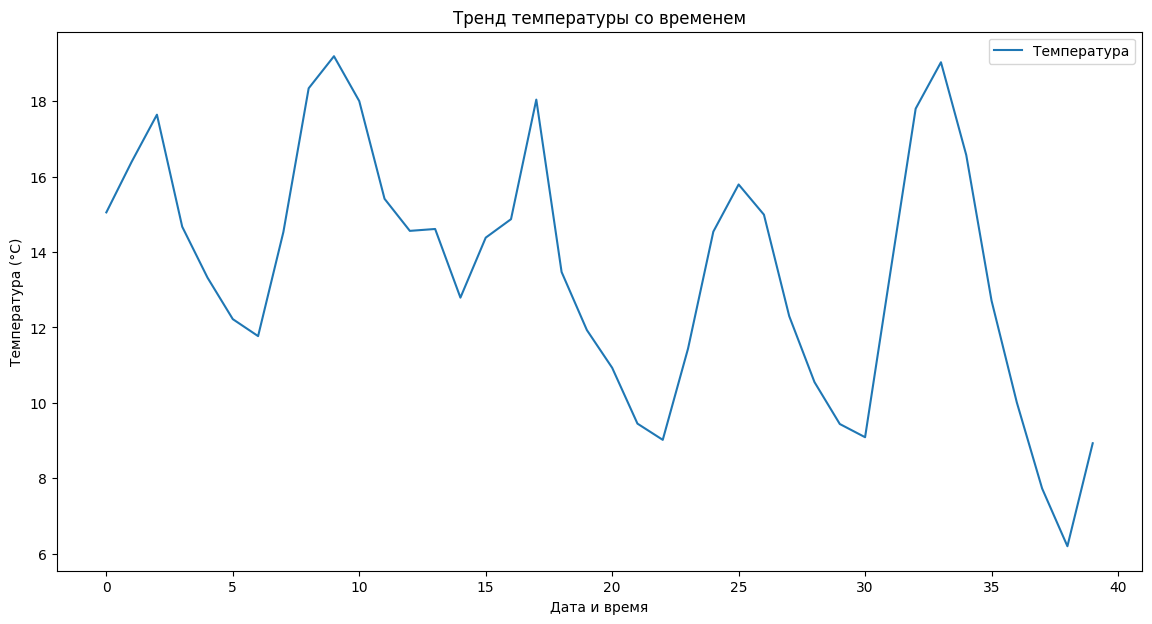

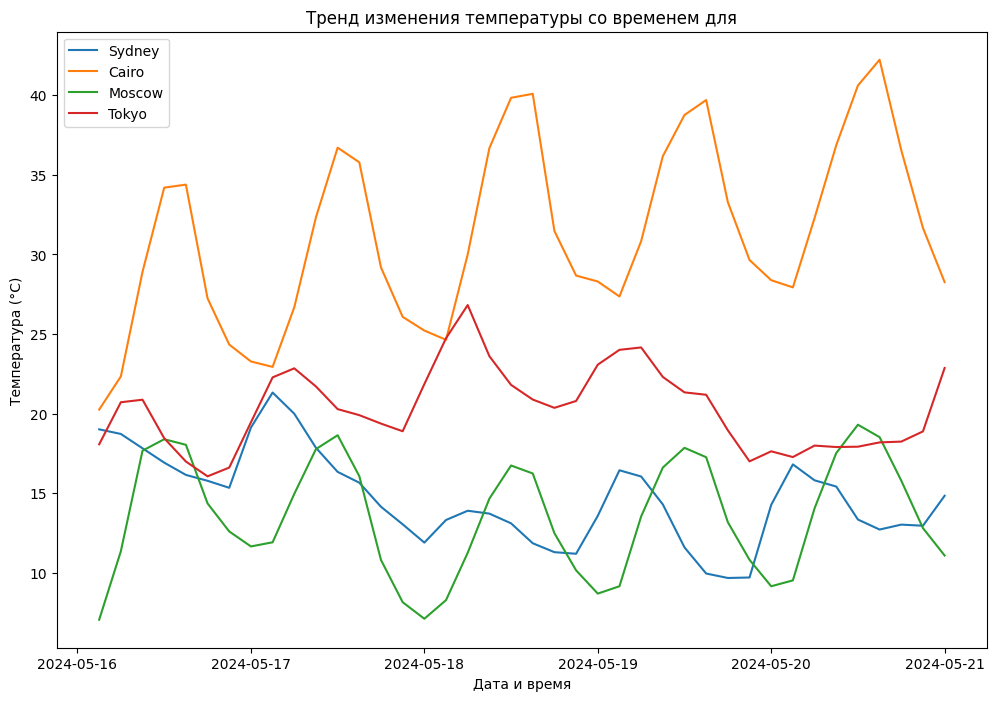

In [163]:
import matplotlib.pyplot as plt

cities = weather_data['city'].unique()
plt.figure(figsize=(12, 8))
for city in cities:
    city_data = weather_data[weather_data['city'] == city]
    plt.plot(city_data['datetime'], city_data['temp'], label=city)
    plt.xlabel('Дата и время')
    plt.ylabel('Температура (°C)')
    plt.title(f'Тренд изменения температуры со временем для')
    plt.legend()
plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

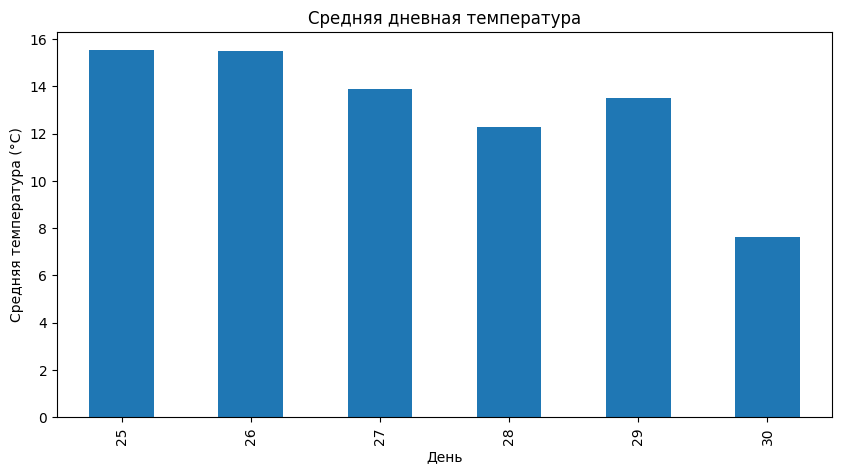

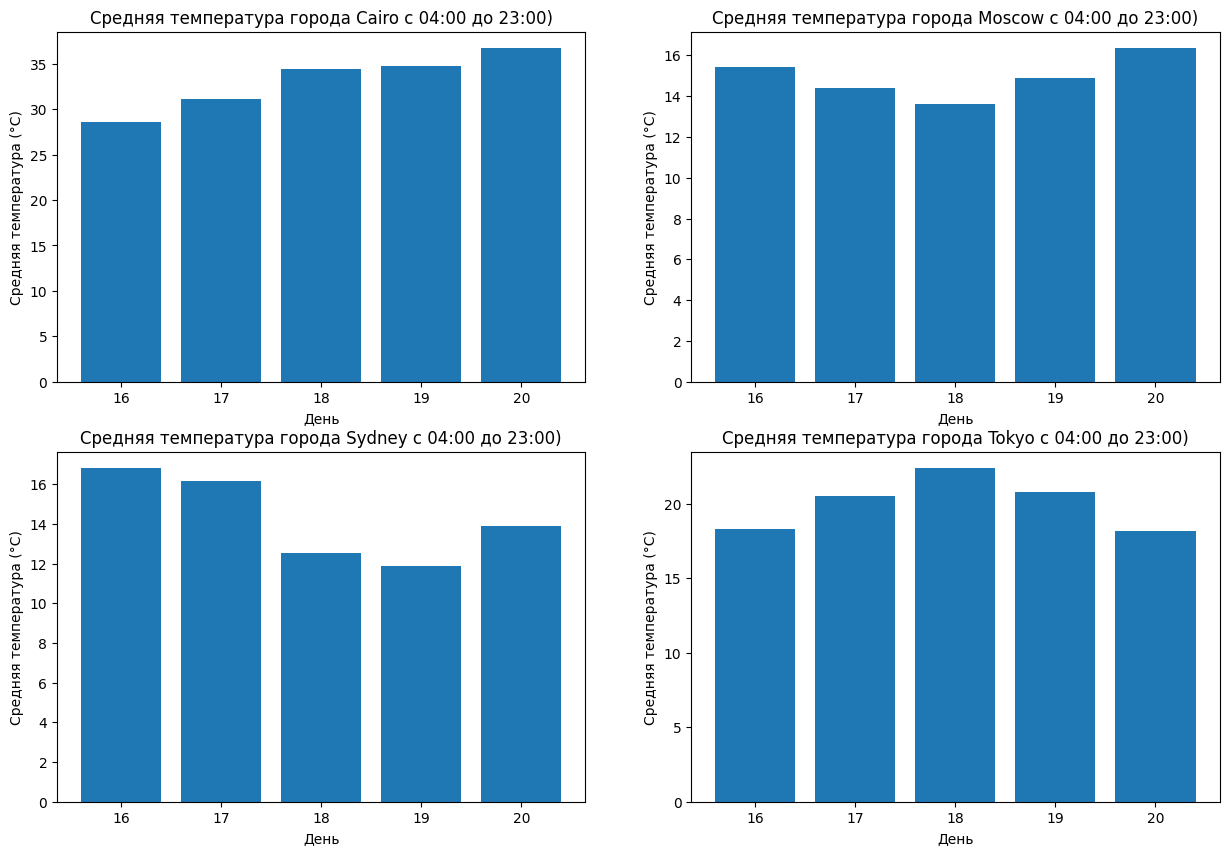

In [168]:
import matplotlib.pyplot as plt

weather_data_filtered = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]
weather_data_grouped = weather_data_filtered.groupby([pd.Grouper(key='datetime', freq='D'), 'city'])['temp'].mean().reset_index()
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, city in enumerate(weather_data_grouped['city'].unique()):
    city_data = weather_data_grouped[weather_data_grouped['city'] == city]
    ax = axs[i // 2, i % 2]
    ax.bar(city_data['datetime'].dt.day, city_data['temp'])
    ax.set_xlabel('День')
    ax.set_ylabel('Средняя температура (°C)')
    ax.set_title(f'Средняя температура города {city} с 04:00 до 23:00)')

plt.show()

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

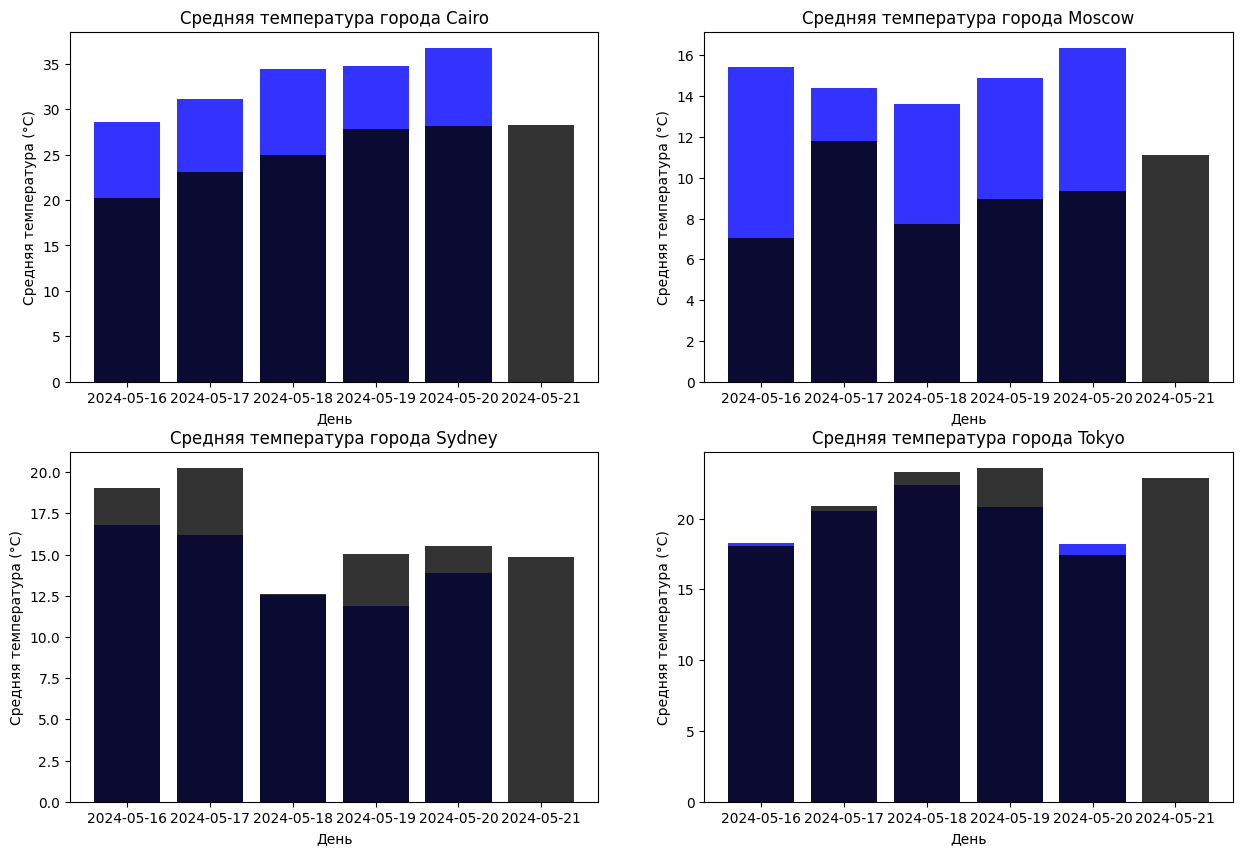

In [169]:
weather_data_day = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]

weather_data_night = weather_data[(weather_data['datetime'].dt.hour >= 23) | (weather_data['datetime'].dt.hour < 4)]

weather_data_day_grouped = weather_data_day.groupby([pd.Grouper(key='datetime', freq='D'), 'city'])['temp'].mean().reset_index()
weather_data_night_grouped = weather_data_night.groupby([pd.Grouper(key='datetime', freq='D'), 'city'])['temp'].mean().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, city in enumerate(weather_data_grouped['city'].unique()):
    city_data_day = weather_data_day_grouped[weather_data_day_grouped['city'] == city]
    city_data_night = weather_data_night_grouped[weather_data_night_grouped['city'] == city]
    ax = axs[i // 2, i % 2]

    ax.bar(city_data_day['datetime'], city_data_day['temp'], color='blue', label='Day', alpha=0.8)
    ax.bar(city_data_night['datetime'], city_data_night['temp'], color='black', label='Night',alpha=0.8)

    ax.set_xlabel('День')
    ax.set_ylabel('Средняя температура (°C)')
    ax.set_title(f'Средняя температура города {city}')

plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

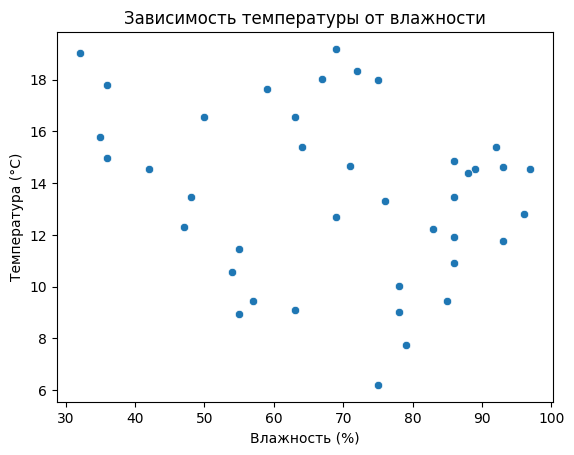

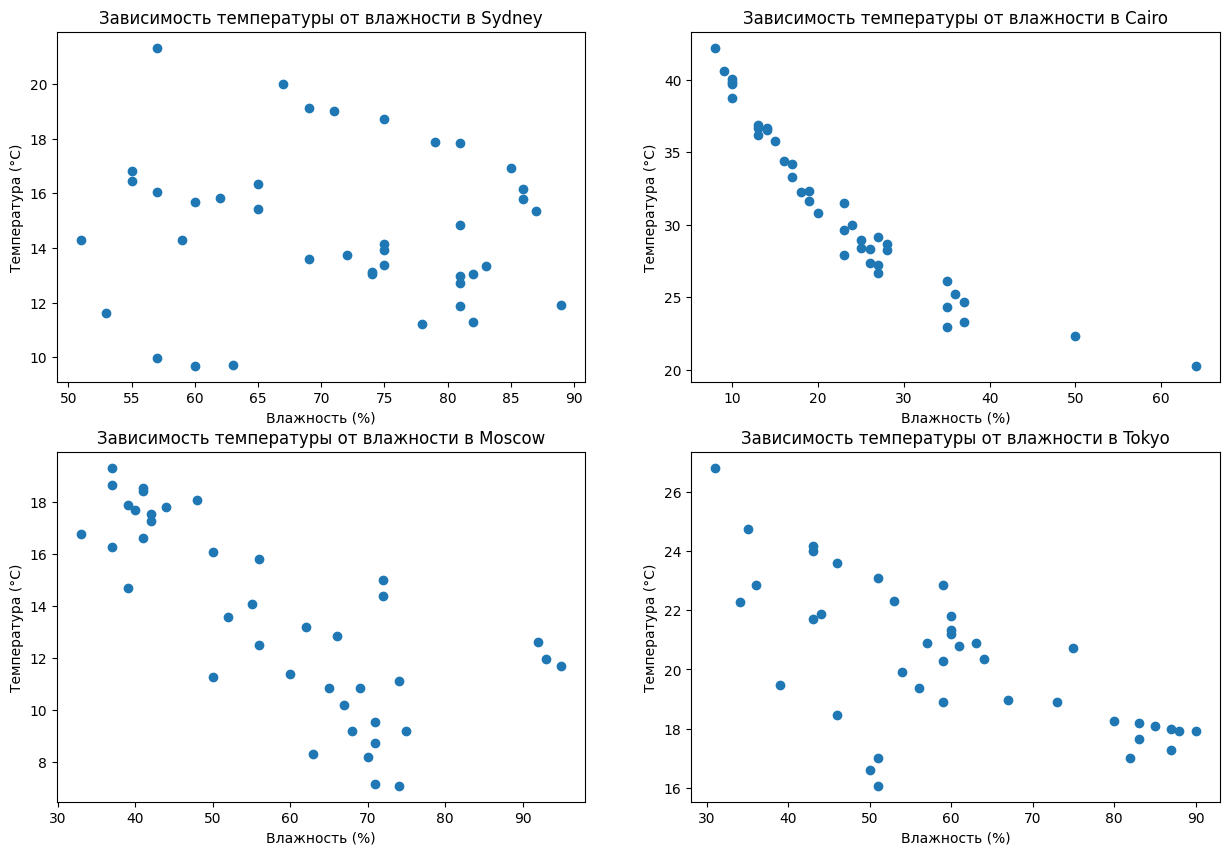

In [170]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, city in enumerate(weather_data['city'].unique()):
    city_data = weather_data[weather_data['city'] == city]
    ax = axs[i // 2, i % 2]
    ax.scatter(city_data['humidity'], city_data['temp'])
    ax.set_xlabel('Влажность (%)')
    ax.set_ylabel('Температура (°C)')
    ax.set_title(f'Зависимость температуры от влажности в {city}')
plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

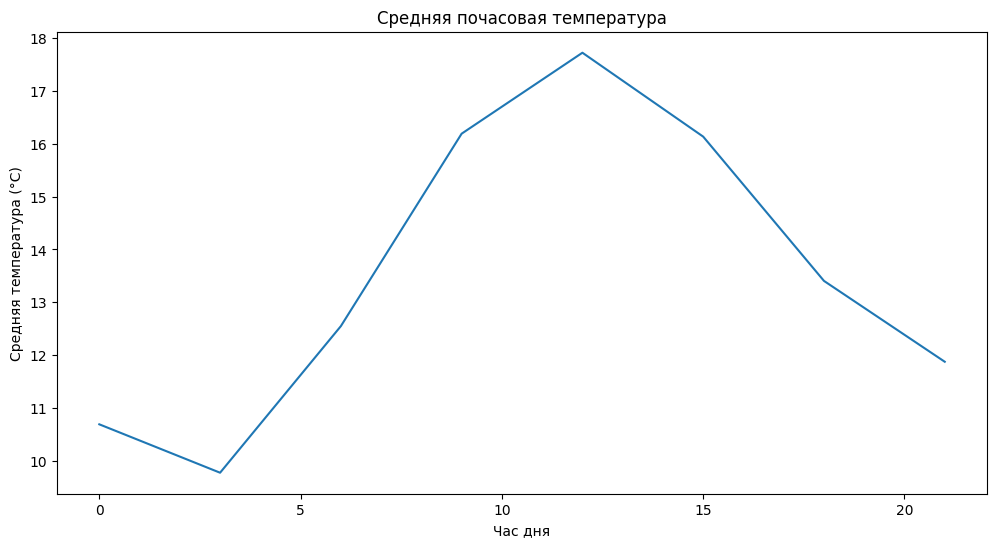

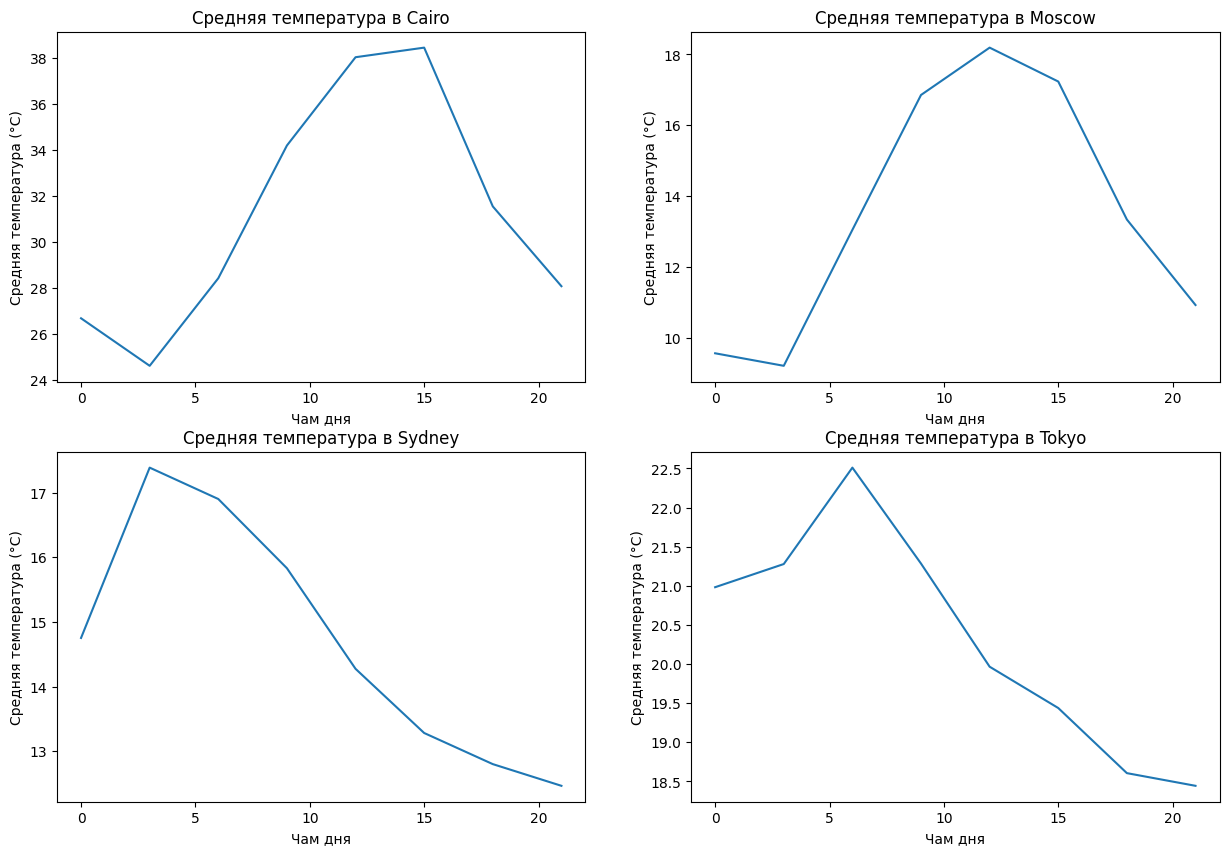

In [171]:
import matplotlib.pyplot as plt

weather_data_grouped = weather_data.groupby([weather_data['datetime'].dt.hour, 'city'])['temp'].mean().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, city in enumerate(weather_data_grouped['city'].unique()):
    city_data = weather_data_grouped[weather_data_grouped['city'] == city]
    ax = axs[i // 2, i % 2]
    ax.plot(city_data['datetime'], city_data['temp'])
    ax.set_xlabel('Чам дня')
    ax.set_ylabel('Средняя температура (°C)')
    ax.set_title(f'Средняя температура в {city}')
plt.show()

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [174]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.theta = np.array([])

    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy()
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        x_transpose = np.transpose(X)
        xtx = np.dot(x_transpose, X)

        try:
            xtxinv = np.linalg.inv(xtx)

        except:
            xtxinv = np.linalg.pinv(xtx)

        xty = np.dot(x_transpose, y)
        self.theta = np.dot(xtxinv, xty)

        return self.theta

    def predict(self, X):
        X = X.to_numpy()
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        return np.dot(X, self.theta)

    def score(self, X, y):
        y_pred = self.predict(X)
        average = np.mean(y)
        ss_res = np.sum((y_pred - y) ** 2)
        ss_tot = np.sum((y - average) ** 2)

        return 1 - (ss_res / ss_tot)


    def add_ones(self, X):
        try:
            high, width = X.shape

        except:
            high, width = X.shape[0], 1

        copy = np.array([])
        for i in (X):
            i = np.append([1], i)
            copy = np.append(copy, i).astype(int)

        X = np.reshape(copy, (high,width+1))

        return X

### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [175]:
from sklearn.model_selection import train_test_split

params = ['temp', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  y = weather_data[param]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = model.score(X_test, y_test)
  scores.append(score)


Выведите оценку точности:

In [180]:
for i in range(len(scores)):
  print(f'Результат для моделей: {scores[i]} for {params[i]}')

Результат для моделей: 0.9999999542089564 for temp
Результат для моделей: 0.9938103545086546 for feels_like
Результат для моделей: 0.9999999650974485 for temp_min
Результат для моделей: 0.9998723040126893 for temp_max
Результат для моделей: 0.7144478762205585 for humidity
Результат для моделей: 0.7277419228380015 for pressure


### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [181]:
params = ['temp', 'humidity', 'pressure']
future = np.random.randint(10, 30, size=(10, 3))
future[:, 1] += 40
future[:, 2] += 990
future = pd.DataFrame(future, columns=params)
scores = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  y = weather_data[param]
  future_X = future[new_params]
  future_y = future[param]
  model = LinearRegression()
  model.fit(X, y)
  y_pred = model.predict(future_X)
  score = model.score(future_X, future_y)
  scores.append(score)


Выведите оценку точности:

In [182]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: -0.11871137907391205 for temp
Score of the model: -14.05236696891655 for humidity
Score of the model: -10.768057099195532 for pressure


### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [183]:
import plotly.express as px

params = ['temp', 'humidity', 'pressure']
days = 2

weather_df = pd.DataFrame()

for i, city in enumerate(weather_data['city'].unique()):

  city_data = weather_data[weather_data['city'] == city]
  old_city_df = city_data.drop(columns=['datetime','feels_like', 'temp_min', 'temp_max'])

  weather_df = pd.concat([weather_df, old_city_df])
  future = np.random.randint(10, 30, size=(days * 8, 3))
  future[:, 1] += 40
  future[:, 2] += 990
  future = pd.DataFrame(future, columns=params)
  new_weather = np.array([])
  for i in range(len(params)):
    param = params[i]
    new_params = params[:i] + params[i+1:]
    X = city_data[new_params]
    y = city_data[param]
    future_X = future[new_params]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(future_X)
    try:
      new_weather = np.vstack((new_weather, y_pred))
    except:
      new_weather = np.array(y_pred)
  new_weather =  new_weather.T
  for data in new_weather:

    new_raw = pd.DataFrame({'city': city,
                            'dt': weather_df['dt'].tail(1)+ 10800,
                            'temp': data[0],
                            'humidity': data[1],
                            'pressure': data[2],
                            'lat': weather_df['lat'].iloc[-1],
                            'lot': weather_df['lot'].iloc[-1]})
    weather_df = pd.concat([weather_df, new_raw],  ignore_index=True)
weather_df['dt'] = pd.to_datetime(weather_df['dt'], unit='s')

fig = px.scatter_mapbox(weather_df,
                        lat="lat",
                        lon="lot",
                        color="temp",
                        size="temp",
                        hover_name="city",
                        hover_data=["temp", "humidity", "pressure"],
                        animation_frame=weather_df['dt'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},
                        zoom=3,
                        mapbox_style="carto-positron",
                        title="Weather Forecast")

fig.show()


## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [ ]:
px.choropleth(
  gapminder, # набор данных
  locations="iso_alpha", # отображение с помощью цвета color
  color="lifeExp", # выбор поля для цвета
  hover_name="country", # hover_field_name
  animation_frame="year", # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [187]:
!pip install statsmodels
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:00


In [188]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

days = 2
weather_df = pd.DataFrame()
for i, city in enumerate(weather_data['city'].unique()):

  city_data = weather_data[weather_data['city'] == city]
  cur_city_df = city_data.drop(columns=['datetime','feels_like', 'temp_min', 'temp_max'])
  weather_df = pd.concat([weather_df, cur_city_df])
  cur_city_df['dt'] = pd.to_datetime(cur_city_df['dt'], unit='s')
  cur_city_df.set_index('dt', inplace = True)
  cur_city_df.resample('3h')
  drops = ['temp', 'humidity','pressure']
  new_weather = np.array([])
  for i in range(3):
    drop = ['city', 'lat',	'lot'] + drops[:i]+ drops[i+1:]
    cur_df = cur_city_df.drop(columns=drop)
    parameter_search = auto_arima(cur_df, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 3, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = False, error_action ='ignore', suppress_warnings = True,  stepwise = True)
    model = SARIMAX(cur_df,
                order = parameter_search.order,
                seasonal_order = parameter_search.seasonal_order,
                with_intercept = parameter_search.with_intercept)
    result = model.fit()
    start = len(cur_df)
    end = len(cur_df) + 8 * days - 1
    predictions = np.array(result.predict(start, end))
    try:
      new_weather = np.vstack((new_weather, predictions))
    except:
      new_weather = np.array(predictions)
  new_weather =  new_weather.T
  for data in new_weather:
    new_raw = pd.DataFrame({'city': city,
                            'dt': weather_df['dt'].tail(1)+ 10800,
                            'temp': data[0],
                            'humidity': data[1],
                            'pressure': data[2],
                            'lat': weather_df['lat'].iloc[-1],
                            'lot': weather_df['lot'].iloc[-1]})
    weather_df = pd.concat([weather_df, new_raw],  ignore_index=True)
weather_df['dt'] = pd.to_datetime(weather_df['dt'], unit='s')
weather_df


,city,dt,temp,humidity,pressure,lat,lot
0,Sydney,2024-05-16 03:00:00,19.020000,71.000000,1027.000000,-33.869844,151.208285
1,Sydney,2024-05-16 06:00:00,18.730000,75.000000,1026.000000,-33.869844,151.208285
2,Sydney,2024-05-16 09:00:00,17.830000,81.000000,1027.000000,-33.869844,151.208285
3,Sydney,2024-05-16 12:00:00,16.930000,85.000000,1027.000000,-33.869844,151.208285
4,Sydney,2024-05-16 15:00:00,16.160000,86.000000,1026.000000,-33.869844,151.208285
...,...,...,...,...,...,...,...
219,Tokyo,2024-05-22 12:00:00,20.607459,65.359295,1017.713812,35.682839,139.759455
220,Tokyo,2024-05-22 15:00:00,20.816053,68.227803,1017.919005,35.682839,139.759455
221,Tokyo,2024-05-22 18:00:00,20.496240,71.618641,1018.298973,35.682839,139.759455
222,Tokyo,2024-05-22 21:00:00,20.372713,69.119099,1018.182028,35.682839,139.759455


In [189]:
fig = px.scatter_mapbox(weather_df,
                        lat="lat",
                        lon="lot",
                        color="temp",
                        size="temp",
                        hover_name="city",
                        hover_data=["temp", "humidity", "pressure"],
                        animation_frame=weather_df['dt'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},
                        zoom=3,
                        mapbox_style="carto-positron",
                        title="Weather Forecast")

fig.show()